<a href="https://colab.research.google.com/github/Joshmen06/principal-component-analysis-project/blob/main/PCA_Project_Assignment_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [465]:
import numpy as np
import pandas as pd

In [466]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [467]:
dataset = pd.read_csv('/content/train.csv')


In [468]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [469]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [470]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [471]:
dataset.shape

(1460, 81)

In [472]:
dataset_numerical_features = [col for col in dataset.columns if dataset[col].dtype == 'float64'] 

dataset_numerical_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [473]:
df=dataset.select_dtypes(['int64','float64'])

In [474]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [475]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [476]:
columns=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in columns:
  df[col]=df[col].fillna(df[col].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [477]:
df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [478]:
corr=df.corr()

In [479]:
corr = corr['SalePrice'][:-1]
df_corr = corr[abs(corr) >=0.60].sort_values(ascending = True)

In [480]:
df_corr

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
Name: SalePrice, dtype: float64

In [481]:
df_final = df[['1stFlrSF','TotalBsmtSF','GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']]

In [482]:
corr = df_final.corr()

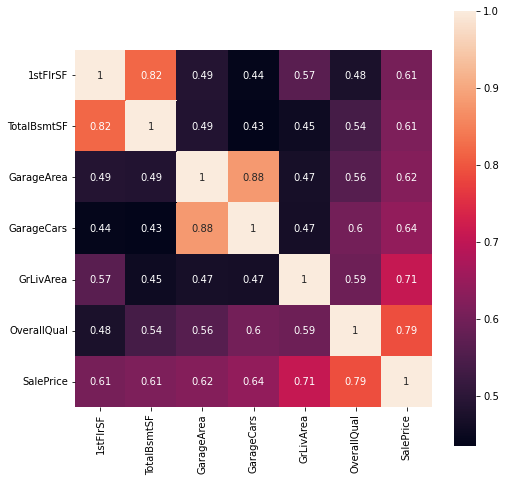

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,square = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


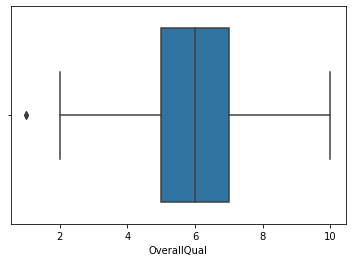

In [484]:
sns.boxplot(df_final['OverallQual'])

In [485]:
Q1= np.percentile(df_final['OverallQual'],25,interpolation='midpoint')
Q2= np.percentile(df_final['OverallQual'],50,interpolation='midpoint')
Q3= np.percentile(df_final['OverallQual'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

2.0
10.0


In [486]:
df_final= df_final[df_final['OverallQual']<upper_limit]
df_final= df_final[df_final['OverallQual']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


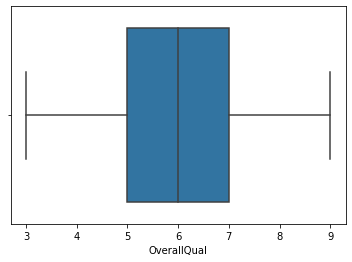

In [487]:
sns.boxplot(df_final['OverallQual'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


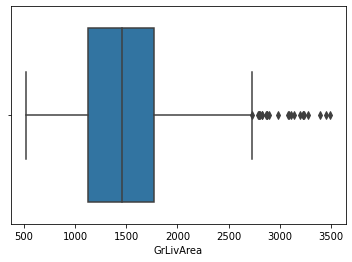

In [488]:
sns.boxplot(df_final['GrLivArea'])

In [489]:
Q1= np.percentile(df_final['GrLivArea'],25,interpolation='midpoint')
Q2= np.percentile(df_final['GrLivArea'],50,interpolation='midpoint')
Q3= np.percentile(df_final['GrLivArea'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

168.0
2728.0


In [490]:
df_final= df_final[df_final['GrLivArea']<upper_limit]
df_final= df_final[df_final['GrLivArea']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


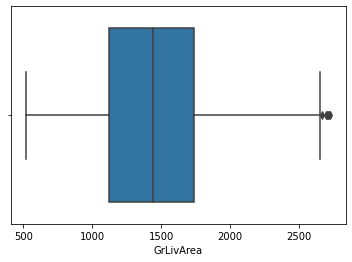

In [491]:
sns.boxplot(df_final['GrLivArea'])

In [492]:
Q1= np.percentile(df_final['GrLivArea'],25,interpolation='midpoint')
Q2= np.percentile(df_final['GrLivArea'],50,interpolation='midpoint')
Q3= np.percentile(df_final['GrLivArea'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

204.75
2658.75


In [493]:
df_final= df_final[df_final['GrLivArea']<upper_limit]
df_final= df_final[df_final['GrLivArea']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


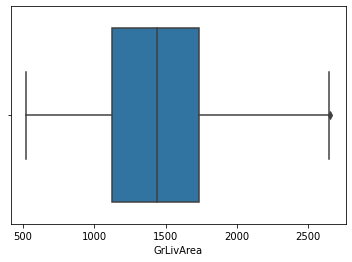

In [494]:
sns.boxplot(df_final['GrLivArea'])

In [495]:
Q1= np.percentile(df_final['GrLivArea'],25,interpolation='midpoint')
Q2= np.percentile(df_final['GrLivArea'],50,interpolation='midpoint')
Q3= np.percentile(df_final['GrLivArea'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

211.0
2647.0


In [496]:
df_final= df_final[df_final['GrLivArea']<upper_limit]
df_final= df_final[df_final['GrLivArea']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


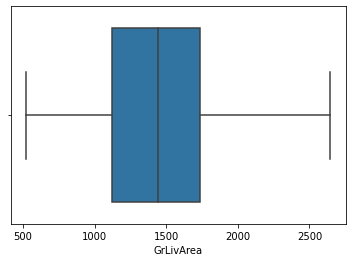

In [497]:
sns.boxplot(df_final['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


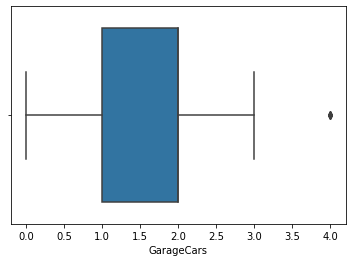

In [498]:
sns.boxplot(df_final['GarageCars'])

In [499]:
Q1= np.percentile(df_final['GarageCars'],25,interpolation='midpoint')
Q2= np.percentile(df_final['GarageCars'],50,interpolation='midpoint')
Q3= np.percentile(df_final['GarageCars'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

-0.5
3.5


In [500]:
df_final= df_final[df_final['GarageCars']<upper_limit]
df_final= df_final[df_final['GarageCars']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


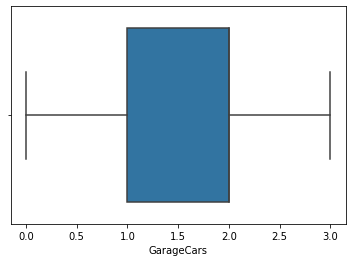

In [501]:
sns.boxplot(df_final['GarageCars'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


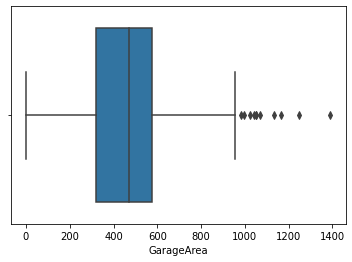

In [502]:
sns.boxplot(df_final['GarageArea'])

In [503]:
Q1= np.percentile(df_final['GarageArea'],25,interpolation='midpoint')
Q2= np.percentile(df_final['GarageArea'],50,interpolation='midpoint')
Q3= np.percentile(df_final['GarageArea'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

-61.5
958.5


In [504]:
df_final= df_final[df_final['GarageArea']<upper_limit]
df_final= df_final[df_final['GarageArea']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


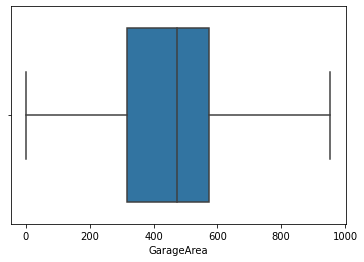

In [505]:
sns.boxplot(df_final['GarageArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


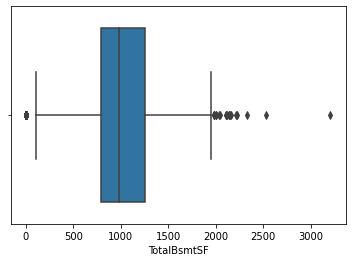

In [506]:
sns.boxplot(df_final['TotalBsmtSF'])

In [507]:
Q1= np.percentile(df_final['TotalBsmtSF'],25,interpolation='midpoint')
Q2= np.percentile(df_final['TotalBsmtSF'],50,interpolation='midpoint')
Q3= np.percentile(df_final['TotalBsmtSF'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

90.5
1958.5


In [508]:
df_final= df_final[df_final['TotalBsmtSF']<upper_limit]
df_final= df_final[df_final['TotalBsmtSF']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


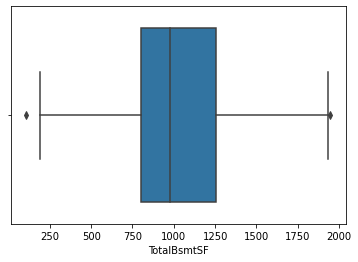

In [509]:
sns.boxplot(df_final['TotalBsmtSF'])

In [510]:
Q1= np.percentile(df_final['TotalBsmtSF'],25,interpolation='midpoint')
Q2= np.percentile(df_final['TotalBsmtSF'],50,interpolation='midpoint')
Q3= np.percentile(df_final['TotalBsmtSF'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

118.25
1936.25


In [511]:
df_final= df_final[df_final['TotalBsmtSF']<upper_limit]
df_final= df_final[df_final['TotalBsmtSF']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


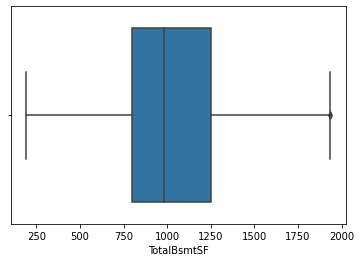

In [512]:
sns.boxplot(df_final['TotalBsmtSF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


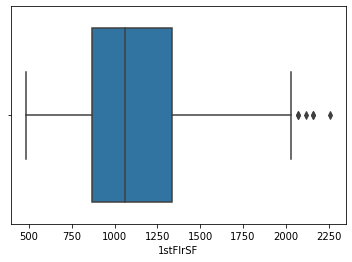

In [513]:
sns.boxplot(df_final['1stFlrSF'])

In [514]:
Q1= np.percentile(df_final['1stFlrSF'],25,interpolation='midpoint')
Q2= np.percentile(df_final['1stFlrSF'],50,interpolation='midpoint')
Q3= np.percentile(df_final['1stFlrSF'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

158.25
2044.25


In [515]:
df_final= df_final[df_final['1stFlrSF']<upper_limit]
df_final= df_final[df_final['1stFlrSF']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


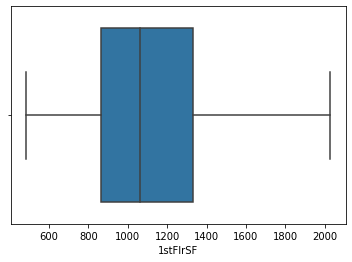

In [516]:
sns.boxplot(df_final['1stFlrSF'])

In [517]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_final)

MinMaxScaler()

In [518]:
df_scaled.head()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,0.241424,0.381662,0.574423,0.666667,0.559737,0.666667,0.472896
1,0.504207,0.614327,0.482180,0.666667,0.349012,0.500000,0.399346
2,0.282848,0.418338,0.637317,0.666667,0.595484,0.666667,0.513756
3,0.309385,0.324355,0.672956,1.000000,0.563029,0.666667,0.286298
4,0.428479,0.547278,0.876310,1.000000,0.789276,0.833333,0.585944


In [519]:
df_scaled = pd.DataFrame(min_max_scaler.transform(df_final))

In [520]:
df_scaled.columns=df_final.columns

In [521]:
df_scaled.head()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,0.241424,0.381662,0.574423,0.666667,0.559737,0.666667,0.472896
1,0.504207,0.614327,0.482180,0.666667,0.349012,0.500000,0.399346
2,0.282848,0.418338,0.637317,0.666667,0.595484,0.666667,0.513756
3,0.309385,0.324355,0.672956,1.000000,0.563029,0.666667,0.286298
4,0.428479,0.547278,0.876310,1.000000,0.789276,0.833333,0.585944


In [522]:
df_scaled.describe()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,0.409837,0.487712,0.478907,0.573655,0.438790,0.506662,0.375159
std,0.206318,0.189162,0.204024,0.236103,0.199015,0.206137,0.168304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246764,0.349570,0.327830,0.333333,0.283866,0.333333,0.259057
50%,0.374434,0.452722,0.492662,0.666667,0.428975,0.500000,0.340779
75%,0.550485,0.608596,0.599581,0.666667,0.563029,0.666667,0.459956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [523]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [524]:
print(pca.components_)

[[ 0.35584221  0.32568177  0.40500558  0.48127954  0.31707152  0.38308682
   0.35264476]
 [ 0.63109061  0.55794498 -0.29674644 -0.41665104 -0.08359326 -0.14738773
  -0.00738495]
 [-0.11001014 -0.17520178 -0.41193258 -0.3844678   0.64090552  0.40573856
   0.25360303]
 [ 0.14843092 -0.11734666  0.14814213  0.08613827  0.64337351 -0.70842023
  -0.13799796]
 [-0.29778648  0.14784211  0.35680454 -0.39229123 -0.10966889 -0.29830506
   0.71221546]
 [ 0.23045515 -0.24204749  0.64366508 -0.52899306  0.04109218  0.26420522
  -0.35024574]
 [ 0.54697407 -0.67654904 -0.12109202  0.076227   -0.23253523 -0.07904451
   0.40287251]]


In [525]:
print(pca.components_.shape)

(7, 7)


In [526]:
print(type(pca.components_))

<class 'numpy.ndarray'>


In [527]:
print(pca.explained_variance_)

[0.1758723  0.044355   0.03307701 0.01875325 0.00545761 0.00506935
 0.00356124]


In [528]:
print(len(pca.explained_variance_))

7


In [529]:
print(pca.singular_values_)

[15.26534622  7.66618371  6.62019918  4.98478237  2.68911415  2.59169652
  2.17224418]


In [530]:
print(pca.mean_)

[0.40983663 0.48771193 0.47890679 0.5736551  0.43878952 0.50666164
 0.37515851]


In [531]:
print(pca.noise_variance_)

0.0


In [532]:
principal_components = pca.fit_transform(df_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(1326, 7)


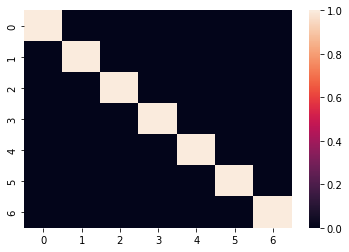

In [533]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

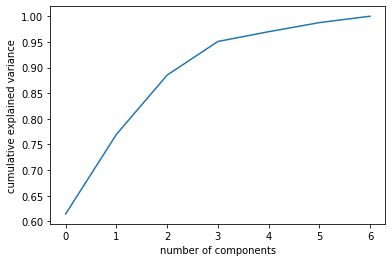

In [534]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [535]:
pca_low_dim = PCA(n_components = 3)

In [536]:
pca_low_dim.fit(df_scaled)

PCA(n_components=3)

In [537]:
print(df_scaled.shape)
print(pca_low_dim.transform(df_scaled).shape)

(1326, 7)
(1326, 3)


In [538]:
print(pca_low_dim.explained_variance_)

[0.1758723  0.044355   0.03307701]


In [539]:
print(pca_low_dim.explained_variance_.sum())

0.2533043057380717


In [540]:
train_x=df_scaled.drop(['SalePrice'],axis = 1)
train_y=df_scaled ['SalePrice']
val_x=df_scaled.drop(['SalePrice'],axis = 1)
val_y=df_scaled ['SalePrice']

In [541]:
from sklearn.linear_model import LinearRegression

In [542]:
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [543]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 0.05735140998104251
Mean Square Error of linear regression: 0.00600557189882865
R_Squared Score of linear regression: 0.7306844203118343


In [544]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [545]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([-0.01244458,  0.21939024,  0.08606017,  0.05912861,  0.24912758,
        0.3378972 ])

In [546]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.7875937380569628
number of feature used: 6
